# DATA 620 - Week 3 Assignment: Graph Visualization

By Eddie Xu and Mohamed Hassan-El Serafi

This week's assignment is to:

Load a graph database of your choosing from a text file or other source.  If you take a large network dataset from the web (such as from Stanford Large Network Dataset Collection), please feel free at this point to load just a small subset of the nodes and edges.
Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing.  You may either code the functions by hand (to build your intuition and insight), or use functions in an existing package. 
Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information.
Please record a short video (~ 5 minutes), and submit a link to the video in advance of our meet-up.

In [46]:
# load dependencies
import networkx as nx
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from pylab import rcParams

In [47]:
# set the matplotlib
%matplotlib inline
rcParams['figure.figsize'] = 10, 10

# Dolphins Network Analysis

Using the dolphin data set for the network analysis

In [48]:
# load data set
cols = ["node1", "node2"]
path = 'https://raw.githubusercontent.com/moham6839/Data_620_Web_Analytics/refs/heads/main/Week_3/mammalia-dolphin-social.edges'
dolphins_df = pd.read_csv( path, header = None, delimiter=' ' )
dolphins_df.columns = cols
print( dolphins_df.shape )
dolphins_df.head()

(159, 2)


,node1,node2
0,1,41
1,1,11
2,1,46
3,1,49
4,1,18


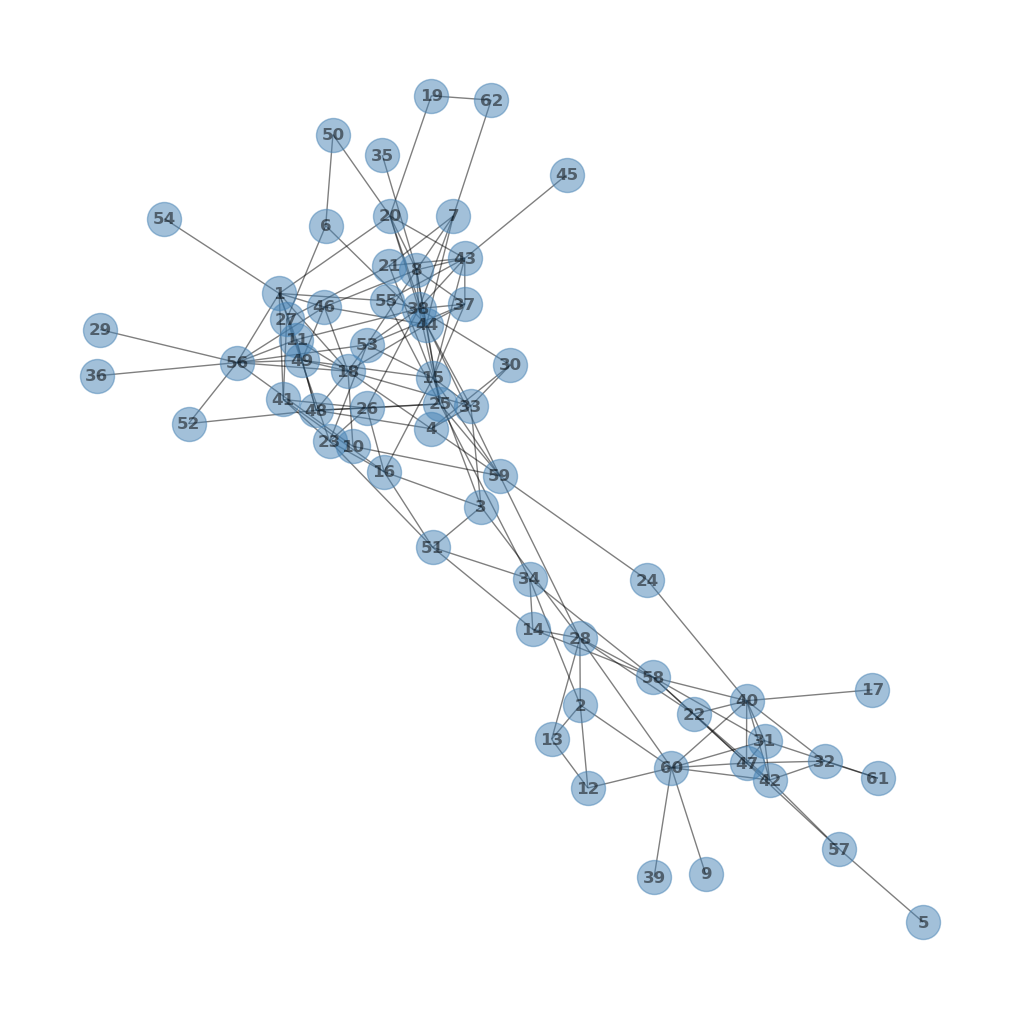

In [49]:
# upload the data set to the network and set into a graph
dolphins = nx.from_pandas_edgelist(dolphins_df, "node1", "node2")
G = nx.Graph(dolphins)

# set a random seed and print the graph of dolphins data set
random.seed(42)
nx.draw(dolphins, with_labels=True, node_color="steelblue", node_size=600, font_weight='bold', 
        edge_color="black", alpha=0.5)

In [50]:
# get the diameter for the network
print(f'the network diameter is {nx.diameter(G)}')

the network diameter is 8


In [51]:
# get the radius for the network
print(f'the network radius is {nx.radius(G)}')

the network radius is 5


In [52]:
# get and print the stat
# exploratory data analysis on the dolphin data
num_nodes = nx.number_of_nodes(G)
num_edges = nx.number_of_edges(G)
avg_degree = sum(dict(G.degree()).values()) / num_nodes
density = nx.density(G)
clustering_coefficient = nx.average_clustering(G)
diameter = nx.diameter(G)
avg_path_length = nx.average_shortest_path_length(G)

# print the stat
stats = {
    "Number of Nodes": num_nodes,
    "Number of Edges": num_edges,
    "Average Degree": avg_degree,
    "Density": density,
    "Clustering Coefficient": clustering_coefficient,
    "Diameter": diameter,
    "Average Path Length": avg_path_length,
}
print(stats)

{'Number of Nodes': 62, 'Number of Edges': 159, 'Average Degree': 5.129032258064516, 'Density': 0.08408249603384453, 'Clustering Coefficient': 0.25895824605502027, 'Diameter': 8, 'Average Path Length': 3.3569539925965097}


## Degree of Connections

In [53]:
# get the degree for the network
degree_dolphins = nx.degree(G)
print(f'the degree for the network is {degree_dolphins}')

the degree for the network is [(1, 9), (41, 5), (11, 6), (46, 6), (49, 7), (18, 11), (20, 7), (54, 1), (55, 4), (56, 10), (2, 5), (12, 3), (34, 5), (28, 8), (13, 3), (60, 9), (3, 5), (16, 6), (33, 6), (51, 5), (15, 9), (4, 5), (48, 7), (59, 7), (30, 3), (5, 1), (57, 3), (6, 3), (50, 2), (27, 4), (44, 11), (7, 5), (8, 10), (62, 2), (21, 4), (38, 12), (35, 1), (37, 6), (43, 8), (53, 7), (25, 8), (9, 1), (10, 3), (14, 4), (58, 7), (23, 6), (26, 6), (17, 1), (40, 9), (19, 2), (22, 5), (42, 7), (47, 8), (24, 2), (29, 1), (31, 6), (61, 2), (32, 4), (36, 1), (39, 1), (45, 1), (52, 2)]


In [54]:
# get the max and min
dolphins_min = min(dict(degree_dolphins).values())
dolphins_max = max(dict(degree_dolphins).values())
print(f'the max is {dolphins_max} and the min is {dolphins_min}')

the max is 12 and the min is 1


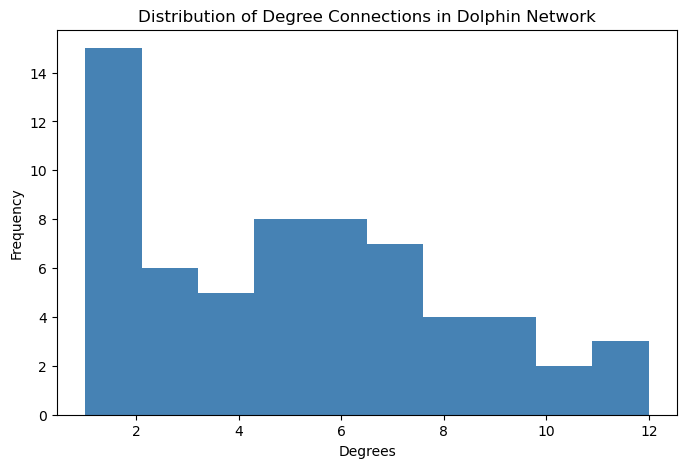

In [55]:
# get the top 10 degree from the dolphins network
dolphins_sorted = sorted(dict(degree_dolphins).items(), key=lambda item: item[1], reverse=True)
top_10_dolphins_degree = dolphins_sorted[:10]

# plot graph
plt.figure(figsize=(8,5))
plt.hist(dict(dolphins_sorted).values(), color = "steelblue")
plt.xlabel('Degrees')
plt.ylabel('Frequency')
plt.title('Distribution of Degree Connections in Dolphin Network');

## Degree Centrality

In [56]:
# get the centrality for the dolphin network
dolphins_dc = nx.degree_centrality(G)
dolphin_centrality_min = min(dict(dolphins_dc).values())
dolphin_centrality_max = max(dict(dolphins_dc).values())
print(f'For centrality, the min is {dolphin_centrality_min} and the max is {dolphin_centrality_max}')

For centrality, the min is 0.01639344262295082 and the max is 0.19672131147540983


In [57]:
# get the top 10 of degree centrality
dolphins_dc_sorted = sorted(dolphins_dc.items(), key=lambda item: item[1], reverse=True)
top_10_dolphins_dc = dolphins_dc_sorted[:10]
top_10_dolphins_dc

[(38, 0.19672131147540983),
 (18, 0.18032786885245902),
 (44, 0.18032786885245902),
 (56, 0.1639344262295082),
 (8, 0.1639344262295082),
 (1, 0.14754098360655737),
 (60, 0.14754098360655737),
 (15, 0.14754098360655737),
 (40, 0.14754098360655737),
 (28, 0.13114754098360656)]

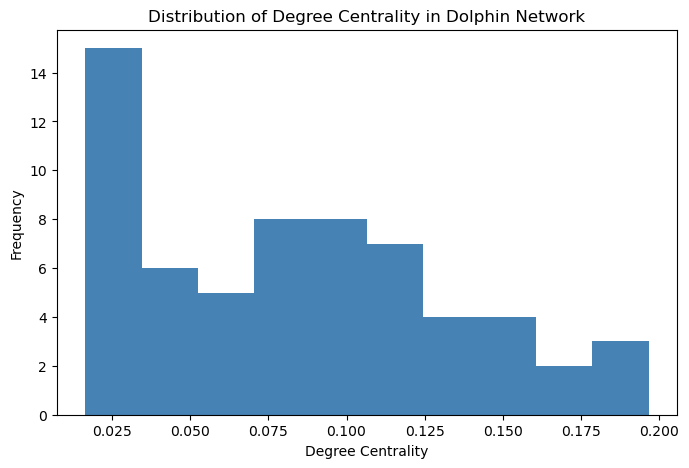

In [58]:
# plot
plt.figure(figsize=(8,5))
plt.hist(dict(dolphins_dc_sorted).values(), color = "steelblue")
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Distribution of Degree Centrality in Dolphin Network');

## Betweenness Centrality

In [59]:
# get the value for betweeness centrality
dolphins_betweenness = nx.betweenness_centrality(G)
dolphins_between_min = min(dict(dolphins_betweenness).values())
dolphins_between_max = max(dict(dolphins_betweenness).values())
print(f'For the betweeness centrality, the min is {dolphin_centrality_min} and the max is {dolphin_centrality_max}')

For the betweeness centrality, the min is 0.01639344262295082 and the max is 0.19672131147540983


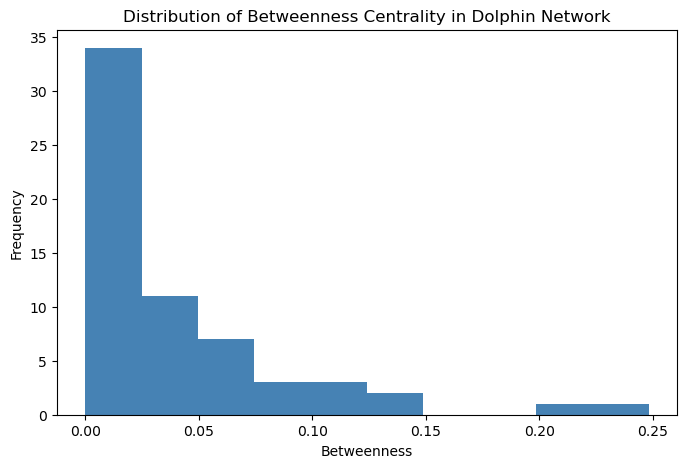

In [60]:
# get the top 10
dolphins_btwn_sorted = sorted(dolphins_betweenness.items(), key=lambda item: item[1], reverse=True)
top_10_dolphins_btwn = dolphins_btwn_sorted[:10]

# plot graph
plt.figure(figsize=(8,5))
plt.hist(dict(dolphins_btwn_sorted).values(), color = "steelblue")
plt.xlabel('Betweenness')
plt.ylabel('Frequency')
plt.title('Distribution of Betweenness Centrality in Dolphin Network');

## Closeness Centrality

In [61]:
# get the closeness centrality
dolphins_closeness = nx.closeness_centrality(dolphins)
dolphins_close_min = min(dict(dolphins_closeness).values())
dolphins_close_max = max(dict(dolphins_closeness).values())
print(f'For closeness centrality, the min is {dolphins_close_min} and the max is {dolphins_close_min}')

For closeness centrality, the min is 0.1783625730994152 and the max is 0.1783625730994152


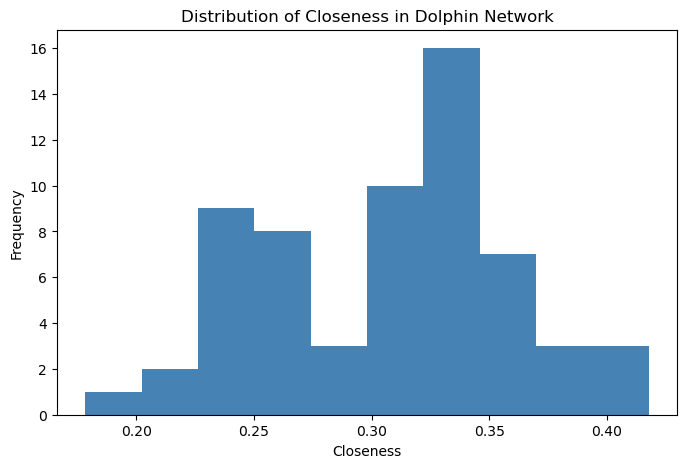

In [62]:
# Find the top ten
dolphinscc_sorted = sorted(dict(dolphins_closeness).items(), key=lambda item: item[1], reverse=True)
top_10_dolphins_cc = dolphinscc_sorted[:10]

# plot
plt.figure(figsize=(8,5))
plt.hist(dict(dolphinscc_sorted).values(), color = "steelblue")
plt.xlabel('Closeness')
plt.ylabel('Frequency')
plt.title('Distribution of Closeness in Dolphin Network');

## Putting it Altogether

In [65]:
names1 = [x[0] for x in top_10_dolphins_degree]
names2 = [x[0] for x in top_10_dolphins_dc]
names3 = [x[0] for x in top_10_dolphins_btwn]
names4 = [x[0] for x in top_10_dolphins_cc]


## use Python sets to compute a union of the sets 
names = list(set(names1) | set(names2) | set(names3) | set(names4))

## build a table with centralities 
data = [[name,degree_dolphins[name], dolphins_dc[name],dolphins_betweenness[name],dolphins_closeness[name]] for name in names]
dolphin_df2 = pd.DataFrame.from_records(data, columns=['Dolphin', 'Degree', 'Degree Centrality', 'Betweenness', 'Closeness'])

In [66]:
dolphin_df2.sort_values(by="Degree", ascending=False)

,Dolphin,Degree,Degree Centrality,Betweenness,Closeness
9,38,12,0.196721,0.061972,0.376543
4,18,11,0.180328,0.040670,0.346591
11,44,11,0.180328,0.138570,0.398693
2,8,10,0.163934,0.057166,0.365269
12,56,10,0.163934,0.084677,0.329730
0,1,9,0.147541,0.065529,0.322751
3,15,9,0.147541,0.102646,0.391026
10,40,9,0.147541,0.084205,0.301980
15,60,9,0.147541,0.114300,0.309645
5,25,8,0.131148,0.143150,0.403974


In [67]:
dolphin_df2.sort_values(by="Degree Centrality", ascending=False)

,Dolphin,Degree,Degree Centrality,Betweenness,Closeness
9,38,12,0.196721,0.061972,0.376543
4,18,11,0.180328,0.040670,0.346591
11,44,11,0.180328,0.138570,0.398693
2,8,10,0.163934,0.057166,0.365269
12,56,10,0.163934,0.084677,0.329730
0,1,9,0.147541,0.065529,0.322751
3,15,9,0.147541,0.102646,0.391026
10,40,9,0.147541,0.084205,0.301980
15,60,9,0.147541,0.114300,0.309645
5,25,8,0.131148,0.143150,0.403974


In [69]:
dolphin_df2.sort_values(by="Betweenness", ascending=False)

,Dolphin,Degree,Degree Centrality,Betweenness,Closeness
14,59,7,0.114754,0.248237,0.417808
6,28,8,0.131148,0.213324,0.371951
5,25,8,0.131148,0.143150,0.403974
11,44,11,0.180328,0.138570,0.398693
8,34,5,0.081967,0.118239,0.365269
15,60,9,0.147541,0.114300,0.309645
3,15,9,0.147541,0.102646,0.391026
13,58,7,0.114754,0.099122,0.324468
12,56,10,0.163934,0.084677,0.329730
10,40,9,0.147541,0.084205,0.301980


In [70]:
dolphin_df2.sort_values(by="Closeness", ascending=False)

,Dolphin,Degree,Degree Centrality,Betweenness,Closeness
14,59,7,0.114754,0.248237,0.417808
5,25,8,0.131148,0.143150,0.403974
11,44,11,0.180328,0.138570,0.398693
3,15,9,0.147541,0.102646,0.391026
9,38,12,0.196721,0.061972,0.376543
6,28,8,0.131148,0.213324,0.371951
1,3,5,0.081967,0.066757,0.365269
2,8,10,0.163934,0.057166,0.365269
8,34,5,0.081967,0.118239,0.365269
7,33,6,0.098361,0.022366,0.363095


# Wildbird

In [ ]:
# extract the wildbird data set
cols = ["node1", "node2", "node3"]
path = 'https://raw.githubusercontent.com/moham6839/Data_620_Web_Analytics/refs/heads/main/Week_3/aves-wildbird-network-3.edges'
birds_df = pd.read_csv( path, header = None, delimiter=' ' )
birds_df.columns = cols
print(birds_df.shape )
birds_df.head()

(1615, 3)


,node1,node2,node3
0,132,73,0.030303
1,132,74,0.008403
2,132,11,0.044776
3,132,12,0.054545
4,132,99,0.044444


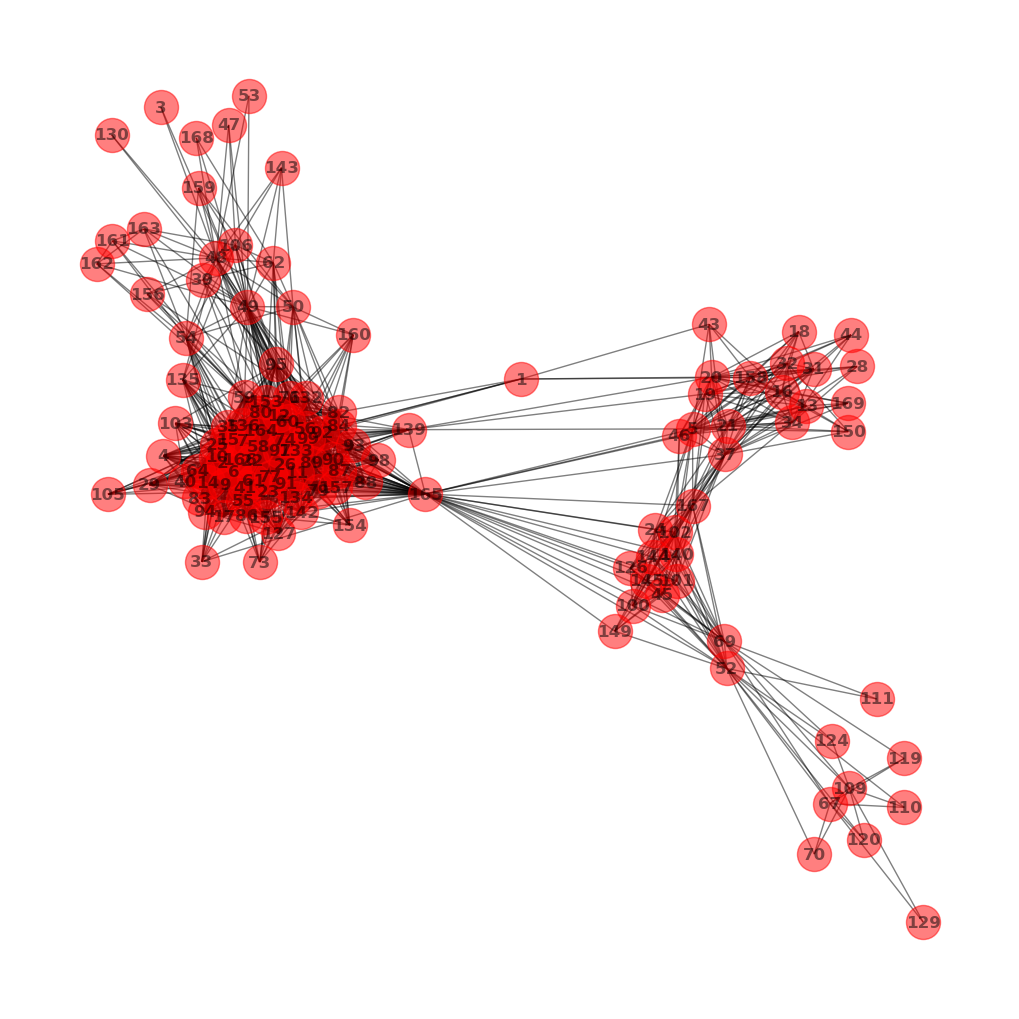

In [ ]:
# pull the wild bird data set into a network and a graph
birds = nx.from_pandas_edgelist(birds_df, "node1", "node2", "node3")
G2 = nx.Graph(birds)

# set the random seed and draw the graph
random.seed(42)
nx.draw(birds, with_labels=True, node_color="red", node_size=600, font_weight='bold', 
        edge_color="black", alpha=0.5)

In [ ]:
print(f'the network diameter is {nx.diameter(G2)} and the network radius is {nx.radius(G2)}')

the network diameter is 6 and the network radius is 3


## Degree of Connections

In [ ]:
# get the min and max for the degree
degree_birds = nx.degree(G2)
degree_birds_min = min(dict(degree_birds).values())
degree_birds_max = max(dict(degree_birds).values())
print(f'For the degree of connections, the min is {degree_birds_min} and the max is {degree_birds_max}')

For the degree of connections, the min is 2 and the max is 58


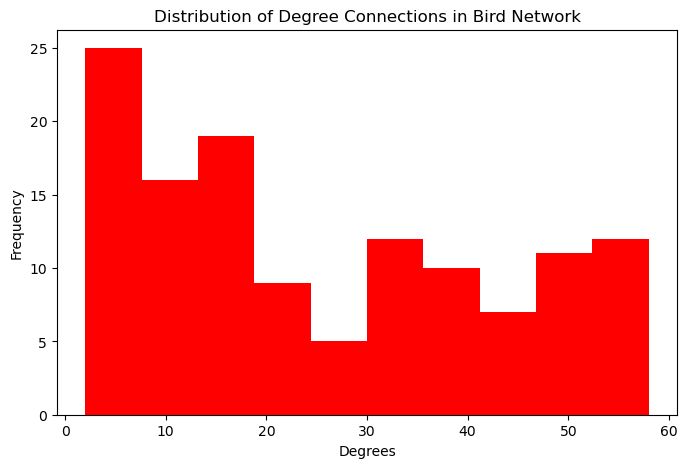

In [ ]:
# get the top 10
birds_sorted = sorted(dict(degree_birds).items(), key=lambda item: item[1], reverse=True)
top_10_birds_degree = birds_sorted[:10]

# plot
plt.figure(figsize=(8,5))
plt.hist(dict(birds_sorted).values(), color = "red")
plt.xlabel('Degrees')
plt.ylabel('Frequency')
plt.title('Distribution of Degree Connections in Bird Network');

## Degree Centrality

In [ ]:
# get the min and max of degree centrality
birds_dc = nx.degree_centrality(G2) 
birds_dc_min = min(dict(birds_dc).values())
birds_dc_max = max(dict(birds_dc).values())
print(f'For the degree centrality, the min is {birds_dc_min} and the max is {birds_dc_max}')

For the degree centrality, the min is 0.016 and the max is 0.464


In [ ]:
# get the top 10
birds_dc_sorted = sorted(birds_dc.items(), key=lambda item: item[1], reverse=True)
top_10_birds_dc = birds_dc_sorted[:10]
top_10_birds_dc

[(58, 0.464),
 (12, 0.456),
 (153, 0.456),
 (59, 0.456),
 (165, 0.456),
 (74, 0.448),
 (26, 0.448),
 (23, 0.44),
 (60, 0.432),
 (6, 0.432)]

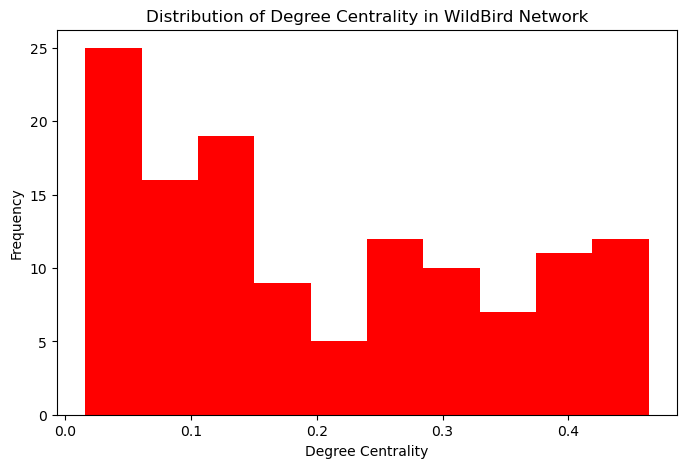

In [ ]:
# plot
plt.figure(figsize=(8,5))
plt.hist(dict(birds_dc_sorted).values(), color = "red")
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Distribution of Degree Centrality in WildBird Network');

## Betweenness Centrality

In [ ]:
# get the min and max for betweeness centrality
birds_betweenness = nx.betweenness_centrality(G2)
birds_bmin = min(dict(birds_betweenness).values())
birds_bmax = max(dict(birds_betweenness).values())
print(f'For the betweenness centrality, the min is {birds_bmin} and the max is {birds_bmax}')

For the betweenness centrality, the min is 0.0 and the max is 0.3756950514271825


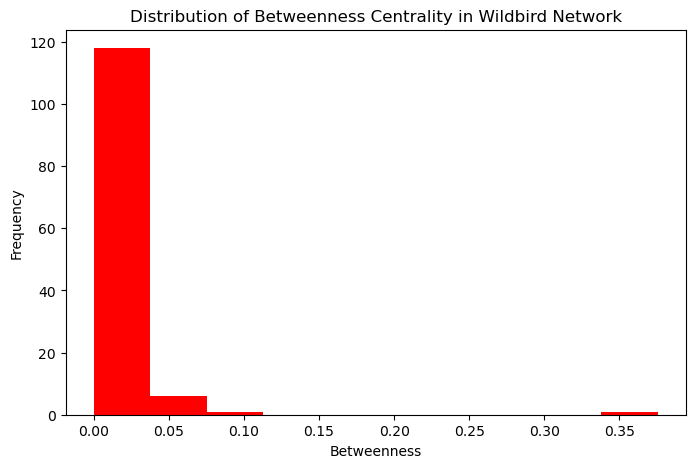

In [ ]:
# get the top 10
birds_btwn_sorted = sorted(birds_betweenness.items(), key=lambda item: item[1], reverse=True)
top_10_birds_btwn = birds_btwn_sorted[:10]

# plot
plt.figure(figsize=(8,5))
plt.hist(dict(birds_btwn_sorted).values(), color = "red")
plt.xlabel('Betweenness')
plt.ylabel('Frequency')
plt.title('Distribution of Betweenness Centrality in Wildbird Network');

## Closeness Centrality

In [ ]:
# get the min and max for closeness centrality
birds_closeness = nx.closeness_centrality(birds)
birds_cmin = min(dict(birds_closeness).values())
birds_cmax = max(dict(birds_closeness).values())
print(f'For the closeness centrality, the min is {birds_cmin} and the max is {birds_cmax}')

For the closeness centrality, the min is 0.23674242424242425 and the max is 0.6218905472636815


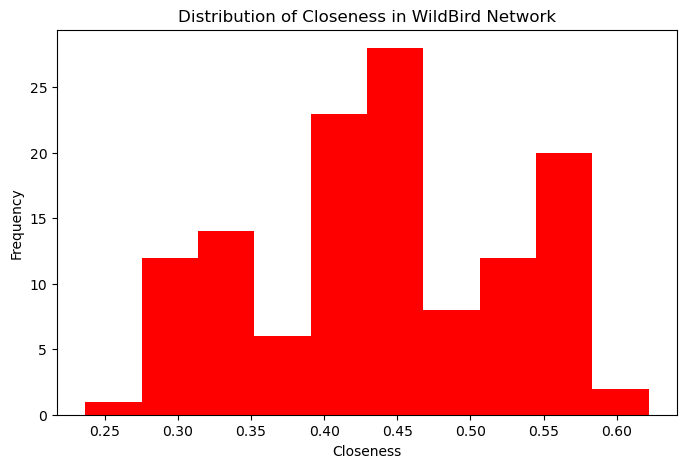

In [ ]:
# Find the top ten
birdscc_sorted = sorted(dict(birds_closeness).items(), key=lambda item: item[1], reverse=True)
top_10_birds_cc = birdscc_sorted[:10]

# plot
plt.figure(figsize=(8,5))
plt.hist(dict(birdscc_sorted).values(), color = "red")
plt.xlabel('Closeness')
plt.ylabel('Frequency')
plt.title('Distribution of Closeness in WildBird Network');

## Putting it Altogether

In [ ]:
bird_names1 = [x[0] for x in top_10_birds_degree]
bird_names2 = [x[0] for x in top_10_birds_dc]
bird_names3 = [x[0] for x in top_10_birds_btwn]
bird_names4 = [x[0] for x in top_10_birds_cc]


## use Python sets to compute a union of the sets 
bird_names = list(set(bird_names1) | set(bird_names2) | set(bird_names3) | set(bird_names4))

## build a table with centralities 
data = [[name,degree_birds[name], birds_dc[name],birds_betweenness[name],birds_closeness[name]] for name in bird_names]
pd.DataFrame.from_records(data, columns=['Bird', 'Degree', 'Degree Centrality', 'Betweenness', 'Closeness'])

,Bird,Degree,Degree Centrality,Betweenness,Closeness
0,69,17,0.136,0.052122,0.425170
1,6,54,0.432,0.009640,0.553097
2,5,22,0.176,0.035071,0.432526
3,74,56,0.448,0.017653,0.563063
4,139,18,0.144,0.037957,0.490196
5,12,57,0.456,0.025961,0.576037
6,11,53,0.424,0.012248,0.565611
7,23,55,0.440,0.013056,0.558036
8,153,57,0.456,0.039356,0.581395
9,26,56,0.448,0.012889,0.573394


In [ ]:
# combine all values into one dataframe
birds_df2 = pd.DataFrame.from_records(data, columns=['Bird', 'Degree', 'Degree Centrality', 'Betweenness', 'Closeness'])
birds_df2.sort_values(by="Degree", ascending=False)

,Bird,Degree,Degree Centrality,Betweenness,Closeness
9,38,12,0.196721,0.061972,0.376543
4,18,11,0.180328,0.040670,0.346591
11,44,11,0.180328,0.138570,0.398693
2,8,10,0.163934,0.057166,0.365269
12,56,10,0.163934,0.084677,0.329730
0,1,9,0.147541,0.065529,0.322751
3,15,9,0.147541,0.102646,0.391026
10,40,9,0.147541,0.084205,0.301980
15,60,9,0.147541,0.114300,0.309645
5,25,8,0.131148,0.143150,0.403974


In [ ]:
birds_df2.sort_values(by="Degree Centrality", ascending=False)

,Bird,Degree,Degree Centrality,Betweenness,Closeness
9,38,12,0.196721,0.061972,0.376543
4,18,11,0.180328,0.040670,0.346591
11,44,11,0.180328,0.138570,0.398693
2,8,10,0.163934,0.057166,0.365269
12,56,10,0.163934,0.084677,0.329730
0,1,9,0.147541,0.065529,0.322751
3,15,9,0.147541,0.102646,0.391026
10,40,9,0.147541,0.084205,0.301980
15,60,9,0.147541,0.114300,0.309645
5,25,8,0.131148,0.143150,0.403974


In [ ]:
birds_df2.sort_values(by="Betweenness", ascending=False)

,Bird,Degree,Degree Centrality,Betweenness,Closeness
14,59,7,0.114754,0.248237,0.417808
6,28,8,0.131148,0.213324,0.371951
5,25,8,0.131148,0.143150,0.403974
11,44,11,0.180328,0.138570,0.398693
8,34,5,0.081967,0.118239,0.365269
15,60,9,0.147541,0.114300,0.309645
3,15,9,0.147541,0.102646,0.391026
13,58,7,0.114754,0.099122,0.324468
12,56,10,0.163934,0.084677,0.329730
10,40,9,0.147541,0.084205,0.301980


In [ ]:
birds_df2.sort_values(by="Closeness", ascending=False)

,Bird,Degree,Degree Centrality,Betweenness,Closeness
14,59,7,0.114754,0.248237,0.417808
5,25,8,0.131148,0.143150,0.403974
11,44,11,0.180328,0.138570,0.398693
3,15,9,0.147541,0.102646,0.391026
9,38,12,0.196721,0.061972,0.376543
6,28,8,0.131148,0.213324,0.371951
1,3,5,0.081967,0.066757,0.365269
2,8,10,0.163934,0.057166,0.365269
8,34,5,0.081967,0.118239,0.365269
7,33,6,0.098361,0.022366,0.363095
